Least Squares
========

# Theory
**Least squares (LS)** approximation primarily try to fit a model function that best approximate a given data set.

## Definition

The **LS** achieve this approximation of the model function, by trying to minimize the sum of squared errors ($r$) between the model function ($\hat{f}$) and the data points. Hence for a set of $n$ data points the **LS** would read
$$
\begin{equation}
\text{LS} := \min \sum_{i=1}^n r_i^2
\end{equation}$$

where the error is defined as $r_i = \hat{f}(\mathbf{x_i}) - y_i$ for some point $(\mathbf{x_i}, y_i)$ in space. 

To minimize the sum of squared errors, **LS** tune the parameters of ($\hat{f}$) such that we got optimal parameters that let ($\hat{f}$) best approximate the trend of a given data points.


## Examples


# Implementation


## Imports

In [24]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [45]:
N = 20                      # number of collocation points
x = np.linspace(1,10, num=N)
f = lambda x: x**3

y = f(x) + np.random.rand(N)
x = x + np.random.rand(N)

points = np.stack((x,y), axis=1)

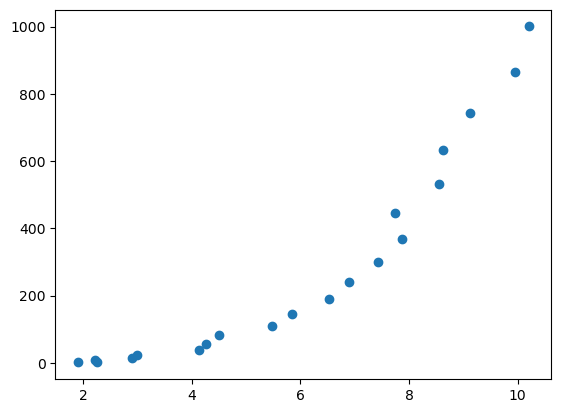

In [46]:
plt.plot(x,y, "o")

## Algorithm



In [47]:
def LS(points: list[float, float]) -> tuple[Callable, list[Callable]]:
    '''
    _summary_

    Args:
        points: _description_

    Returns:
        _description_
    '''

    # error equations components "i.e. Ax - c = errors"
    A = np.stack((points[:,0]**2, points[:,0], np.ones_like(points[:,0])), axis=1)
    c = points[:,1]
    
    # normal equations components "i.e. A*x = b"
    A_star = np.dot(A.T,A)
    b = np.dot(A.T,c)
    
    x = np.linalg.solve(A_star, b)
    
    return x

## Results Visualization


In [48]:
beta = LS(points)
beta

array([  19.64801516, -125.48089771,  202.32651323])

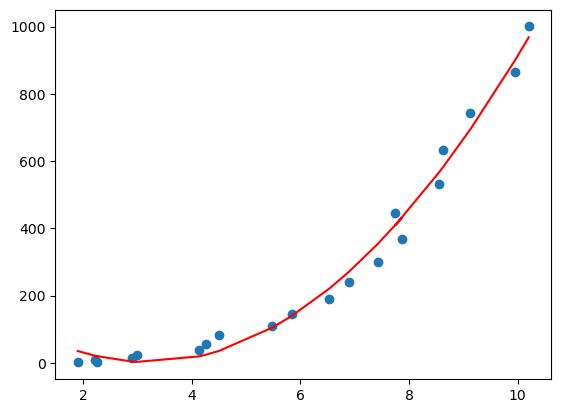

In [49]:
plt.plot(x,y, "o")
plt.plot(x, beta[0]*x**2 + beta[1]*x + beta[2], "r")